In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
df = pd.read_csv("/content/MS&E125 Final Project Survey Responses - Form Responses 1.csv")
df.head()

,Timestamp,Stanford email (for notification if selected as a gift card winner; kept confidential).,Do you identify as a first-generation college student?,Do you identify as low-income?,"What was your most desired career path when you first enrolled at Stanford? (If not applicable, please indicate “N/A”)","What is your most desired current career path? (If it hasn't changed, please enter the same as above.)","If your career path changed, what were the main factors influencing this change? (Select all that apply.)","On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?","On a scale from 0-3, how well has Stanford provided the necessary academic support for your career development?","On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?",What is your academic year?,How do you identify your gender?,What is your race/ethnicity? (Please select all that apply.)
0,5/25/2024 19:30:18,NaN,Yes,Yes,Computer Science/Information Technology,Computer Science/Information Technology,"Changing personal interests or passions, Insuf...",3: Very well,1: Minimal support and uncertainty,1: Mild - experiencing occasional mild symptom...,Freshman,Man,Asian
1,5/25/2024 19:36:24,mbuyan@stanford.edu,No,Yes,Medicine/Healthcare,Business/Finance,"Changing personal interests or passions, Lack ...",1: Somewhat,1: Minimal support and uncertainty,1: Mild - experiencing occasional mild symptom...,Sophomore,Woman,Asian
2,5/25/2024 19:37:12,sunur@stanford.edu,Yes,Yes,Social Sciences/Public Service,Engineering,"Changing personal interests or passions, Wante...",2: Adequately,2: Some support and occasional clarity,1: Mild - experiencing occasional mild symptom...,Senior,Woman,Asian
3,5/25/2024 19:39:19,ninjinb@stanford.edu,No,Yes,Education,Education,NaN,0: Not at all,2: Some support and occasional clarity,1: Mild - experiencing occasional mild symptom...,Sophomore,Woman,Asian
4,5/25/2024 19:44:05,NaN,Yes,Yes,Social Sciences/Public Service,Computer Science/Information Technology,Lack of financial support/resources,1: Somewhat,2: Some support and occasional clarity,2: Moderate - facing noticeable challenges dai...,Junior,Woman,Asian


# Data Cleaning


In [ ]:
df.columns

Index(['Timestamp',
       'Stanford email (for notification if selected as a gift card winner; kept confidential).',
       'Do you identify as a first-generation college student?',
       'Do you identify as low-income?',
       'What was your most desired career path when you first enrolled at Stanford? (If not applicable, please indicate “N/A”)',
       'What is your most desired current career path? (If it hasn't changed, please enter the same as above.)',
       'If your career path changed, what were the main factors influencing this change? (Select all that apply.)',
       'On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?',
       'On a scale from 0-3, how well has Stanford provided the necessary academic support for your career development?',
       'On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?',
       'What is your academic year?', 'How do you i

In [ ]:
df['Financial_Support_Rating'] = df['On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?'].astype(str).str[0]

In [ ]:
df['Academic_Support_Rating'] = df['On a scale from 0-3, how well has Stanford provided the necessary academic support for your career development?'].astype(str).str[0]

In [ ]:
df['Mental_health_rating'] = df['On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?'].astype(str).str[0]

# Standard Error Calculation

In [ ]:
# SE for first-generation students
p = df['Do you identify as a first-generation college student?'].value_counts(normalize=True)['Yes']
n = len(df)

se = np.sqrt(p * (1 - p) / n)

print(f"Proportion (p): {p}")
print(f"Sample size (n): {n}")
print(f"Standard Error (SE): {se}")

Proportion (p): 0.6138613861386139
Sample size (n): 101
Standard Error (SE): 0.04844467956018539


In [ ]:
# Stanford Error for students' financial support ratings
df['Financial_Support_Rating'] = pd.to_numeric(df['Financial_Support_Rating'], errors='coerce')

mean_rating = df['Financial_Support_Rating'].mean()
std_dev = df['Financial_Support_Rating'].std()
n = len(df)

se_financial = std_dev / np.sqrt(n)

print(f"Mean rating: {mean_rating}")
print(f"Standard deviation: {std_dev}")
print(f"Sample size (n): {n}")
print(f"Standard Error (SE): {se_financial}")

Mean rating: 1.7920792079207921
Standard deviation: 1.0518253817356598
Sample size (n): 101
Standard Error (SE): 0.10466053724338001


In [ ]:
# Standard Error for students' academic support ratings
df['Academic_Support_Rating'] = pd.to_numeric(df['Academic_Support_Rating'], errors='coerce')

mean_rating = df['Academic_Support_Rating'].mean()
std_dev = df['Academic_Support_Rating'].std()
n = len(df)

se_academic = std_dev / np.sqrt(n)

print(f"Mean rating: {mean_rating}")
print(f"Standard deviation: {std_dev}")
print(f"Sample size (n): {n}")
print(f"Standard Error (SE): {se_academic}")

Mean rating: 1.9801980198019802
Standard deviation: 0.706826683421077
Sample size (n): 101
Standard Error (SE): 0.07033188370367541


In [ ]:
# Standard error for students' well-being challenge ratings
df['Mental_health_rating'] = pd.to_numeric(df['Mental_health_rating'], errors='coerce')

mean_rating = df['Mental_health_rating'].mean()
std_dev = df['Mental_health_rating'].std()
n = len(df)

se_mental = std_dev / np.sqrt(n)

print(f"Mean rating: {mean_rating}")
print(f"Standard deviation: {std_dev}")
print(f"Sample size (n): {n}")
print(f"Standard Error (SE): {se_mental}")

Mean rating: 1.5148514851485149
Standard deviation: 0.9339578297347114
Sample size (n): 101
Standard Error (SE): 0.09293227746738467


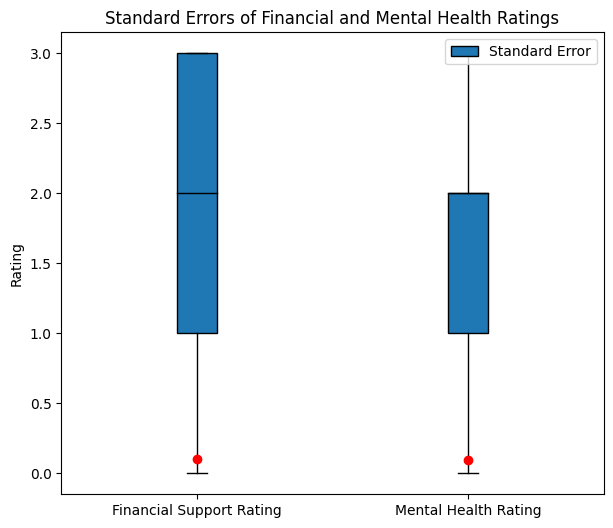

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

box_data = [df['Financial_Support_Rating'], df['Mental_health_rating']]
box_labels = ['Financial Support Rating', 'Mental Health Rating']

ax.boxplot(box_data, labels=box_labels, patch_artist=True, medianprops=dict(color='black'))

se_values = [se_financial, se_mental]
for i, se in enumerate(se_values, start=1):
    ax.plot(i, se, 'ro')  # red dog for standard error

ax.set_title('Standard Errors of Financial and Mental Health Ratings')
ax.set_ylabel('Rating')

plt.legend(['Standard Error'], loc='upper right')
plt.show()


# Career Change Visualization


In [ ]:
# Sankey Diagram
import plotly.graph_objects as go

df_filtered = df[['What was your most desired career path when you first enrolled at Stanford? (If not applicable, please indicate “N/A”)',
                  'What is your most desired current career path? (If it hasn\'t changed, please enter the same as above.)']]

df_filtered.columns = ['Initial_Career_Path', 'Current_Career_Path']

all_career_paths = pd.concat([df_filtered['Initial_Career_Path'], df_filtered['Current_Career_Path']]).unique()
career_path_indices = {career: idx for idx, career in enumerate(all_career_paths)}

source = []
target = []
value = []

for _, row in df_filtered.iterrows():
    initial_idx = career_path_indices[row['Initial_Career_Path']]
    current_idx = career_path_indices[row['Current_Career_Path']]
    source.append(initial_idx)
    target.append(current_idx)

df_counts = pd.DataFrame({'source': source, 'target': target})
df_counts = df_counts.value_counts().reset_index(name='value')

initial_career_paths = df_filtered['Initial_Career_Path'].unique()
current_career_paths = df_filtered['Current_Career_Path'].unique()

initial_indices = {career: idx for idx, career in enumerate(initial_career_paths)}
current_indices = {career: idx + len(initial_career_paths) for idx, career in enumerate(current_career_paths)}

adjusted_source = [initial_indices[all_career_paths[src]] for src in df_counts['source']]
adjusted_target = [current_indices[all_career_paths[tgt]] for tgt in df_counts['target']]

all_career_paths = list(initial_career_paths) + list(current_career_paths)

colors = plt.cm.get_cmap('tab10', len(df))  # Use a categorical color map with enough unique colors
link_colors = [f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.6)' for r, g, b, _ in colors(np.linspace(0, 1, len(df)))]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_career_paths,
        color=['blue', 'red', 'pink', 'green', 'skyblue', 'purple', 'orange', 'yellow', 'brown', 'gray']
    ),
    link=dict(
        source=adjusted_source,
        target=adjusted_target,
        value=df_counts['value'],
        color=link_colors,
        line=dict(color='rgba(0, 0, 0, 0.2)', width=0.5)
    )
)])

fig.update_layout(
    title="Career Path Changes Among Stanford Students",
    font_size=10,
    plot_bgcolor='white',
    margin=dict(l=20, r=20, t=40, b=20),
)

fig.show()


<ipython-input-12-381f4da03450>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(df))  # Use a categorical color map with enough unique colors


# Distribution of Ratings Visualization

In [ ]:
df.loc[df['Do you identify as a first-generation college student?'] == 'Yes', 'Do you identify as a first-generation college student?'] = 1
df.loc[df['Do you identify as a first-generation college student?'] == 'No', 'Do you identify as a first-generation college student?'] = 0
df.loc[df['Do you identify as low-income?'] == 'Yes', 'Do you identify as low-income?'] = 1
df.loc[df['Do you identify as low-income?'] == 'No', 'Do you identify as low-income?'] = 0

In [ ]:
df['response_number'] = df.index + 1

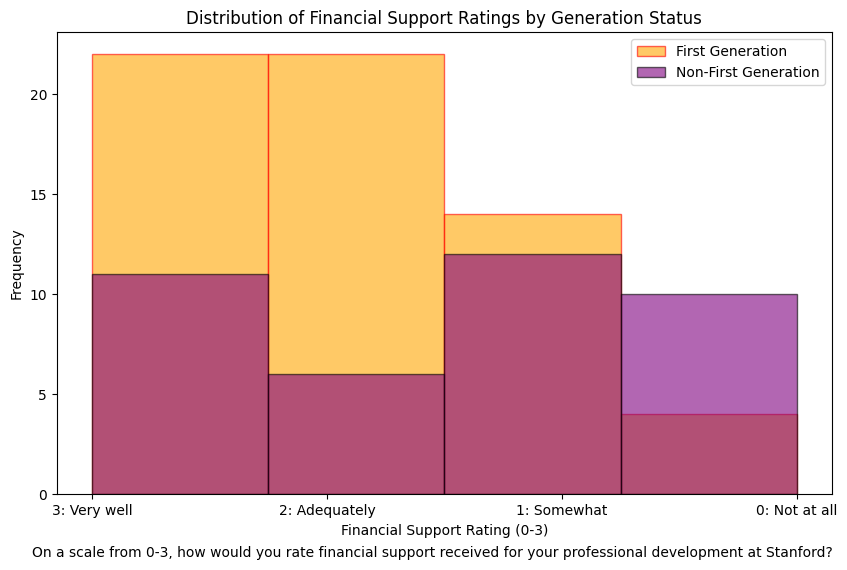

In [ ]:
first_gen_data = df[df['Do you identify as a first-generation college student?'] == 1]['On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?']
non_first_gen_data = df[df['Do you identify as a first-generation college student?'] == 0]['On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?']

plt.figure(figsize=(10, 6))

plt.hist(first_gen_data, bins=4, color='orange', alpha=0.6, label='First Generation', histtype='bar', edgecolor='red')
plt.hist(non_first_gen_data, bins=4, color='purple', alpha=0.6, label='Non-First Generation', histtype='bar', edgecolor='black')

plt.figtext(0.5, 0.0002,  # Adjust x and y coordinates as needed
            'On a scale from 0-3, how would you rate financial support received for your professional development at Stanford?',
            ha='center', va='bottom', fontsize=10, wrap=True)

plt.xlabel('Financial Support Rating (0-3)')
plt.ylabel('Frequency')
plt.title('Distribution of Financial Support Ratings by Generation Status')
plt.xticks(range(4))
plt.legend()

plt.show()


In [ ]:
df2 = first_gen_data.iloc[::-1]
df2.head()

100      1: Somewhat
99     2: Adequately
98       1: Somewhat
95      3: Very well
94      3: Very well
Name: On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?, dtype: object

In [ ]:
print(first_gen_data.value_counts())
print(non_first_gen_data.value_counts())

On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?
3: Very well     22
2: Adequately    22
1: Somewhat      14
0: Not at all     4
Name: count, dtype: int64
On a scale from 0-3, how would you rate the financial support you have received for your professional development at Stanford?
1: Somewhat      12
3: Very well     11
0: Not at all    10
2: Adequately     6
Name: count, dtype: int64


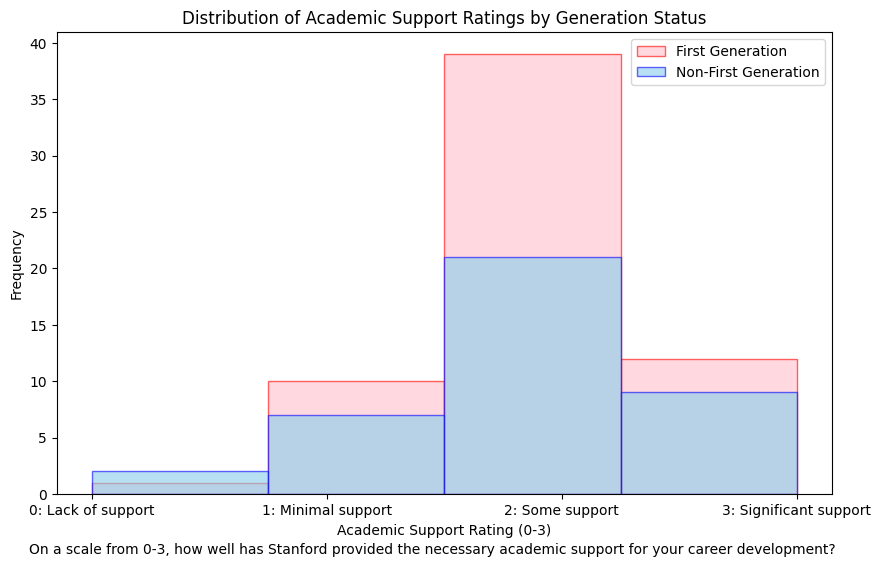

In [ ]:
first_gen_data = df[df['Do you identify as a first-generation college student?'] == 1]['Academic_Support_Rating']
non_first_gen_data = df[df['Do you identify as a first-generation college student?'] == 0]['Academic_Support_Rating']

plt.figure(figsize=(10, 6))

plt.hist(first_gen_data, bins=4, color='pink', alpha=0.6, label='First Generation', histtype='bar', edgecolor='red')
plt.hist(non_first_gen_data, bins=4, color='skyblue', alpha=0.6, label='Non-First Generation', histtype='bar', edgecolor='blue')

plt.figtext(0.5, 0.005,  # Adjust x and y coordinates as needed
            'On a scale from 0-3, how well has Stanford provided the necessary academic support for your career development?',
            ha='center', va='bottom', fontsize=10, wrap=True)

plt.xlabel('Academic Support Rating (0-3)')
plt.ylabel('Frequency')
plt.title('Distribution of Academic Support Ratings by Generation Status')
custom_xtick_labels = ['0: Lack of support', '1: Minimal support', '2: Some support', '3: Significant support']

# Set both tick positions and labels
plt.xticks(range(4), custom_xtick_labels)
plt.legend()

plt.show()


In [ ]:
print(first_gen_data.value_counts())
print(non_first_gen_data.value_counts())

Academic_Support_Rating
2    39
3    12
1    10
0     1
Name: count, dtype: int64
Academic_Support_Rating
2    21
3     9
1     7
0     2
Name: count, dtype: int64


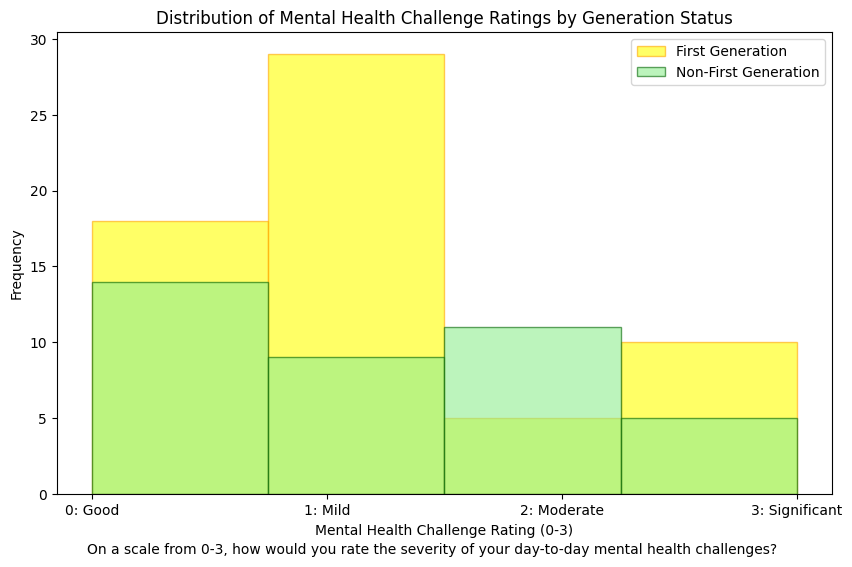

In [ ]:
first_gen_data = df[df['Do you identify as a first-generation college student?'] == 1][
    'On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?'
].astype(str).str[0]
non_first_gen_data = df[df['Do you identify as a first-generation college student?'] == 0][
    'On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?'
].astype(str).str[0]

plt.figure(figsize=(10, 6))

# Use histtype='bar' for separate bars
plt.hist(first_gen_data, bins=4, color='yellow', alpha=0.6, label='First Generation', histtype='bar', edgecolor='orange')
plt.hist(non_first_gen_data, bins=4, color='lightgreen', alpha=0.6, label='Non-First Generation', histtype='bar', edgecolor='darkgreen')

plt.figtext(0.5, 0.005,  # Adjust x and y coordinates as needed
            'On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?',
            ha='center', va='bottom', fontsize=10, wrap=True)

plt.xlabel('Mental Health Challenge Rating (0-3)')
plt.ylabel('Frequency')
plt.title('Distribution of Mental Health Challenge Ratings by Generation Status')
custom_xtick_labels = ['0: Good', '1: Mild', '2: Moderate', '3: Significant']
plt.xticks(range(4), custom_xtick_labels)
plt.legend()

plt.show()

In [ ]:
print(first_gen_data.value_counts())
print(non_first_gen_data.value_counts())

On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?
2    29
1    18
3    10
0     5
Name: count, dtype: int64
On a scale from 0-3, how would you rate the severity of your day-to-day mental health challenges?
1    14
0    11
2     9
3     5
Name: count, dtype: int64
